## Q1

In [ ]:
# Glucose - Correlation
import math

In [2]:
age = [43, 21, 25, 42, 57, 59]      
glucose = [99, 65, 79, 75, 87, 81] 

In [3]:
n = len(age)
sum_x = sum(age)
sum_y = sum(glucose)
sum_x_sq = sum(x**2 for x in age)      
sum_y_sq = sum(y**2 for y in glucose)   
sum_xy = sum(x*y for x, y in zip(age, glucose))

In [4]:
numerator = (n * sum_xy) - (sum_x * sum_y)

In [5]:
term_x = (n * sum_x_sq) - (sum_x ** 2)
term_y = (n * sum_y_sq) - (sum_y ** 2)
denominator = math.sqrt(term_x * term_y)

In [ ]:
r = numerator/denominator

print(f"The correlation coefficient (r) is: {r:.4f}")

The correlation coefficient (r) is: 0.5298


## Q2

In [ ]:
# Student Performance - LinearReg - ScatterPlot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
df = pd.read_csv('StudentsPerformance.csv')

In [9]:
X = df[['reading score', 'writing score']]
y = df['math score']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y_pred = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print("Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")
print("\nCoefficients:")
print(f"Reading Score weight: {model.coef_[0]:.2f}")
print(f"Writing Score weight: {model.coef_[1]:.2f}")

Model Performance Metrics:
Mean Squared Error (MSE): 77.24
R² Score: 0.6826

Coefficients:
Reading Score weight: 0.58
Writing Score weight: 0.27


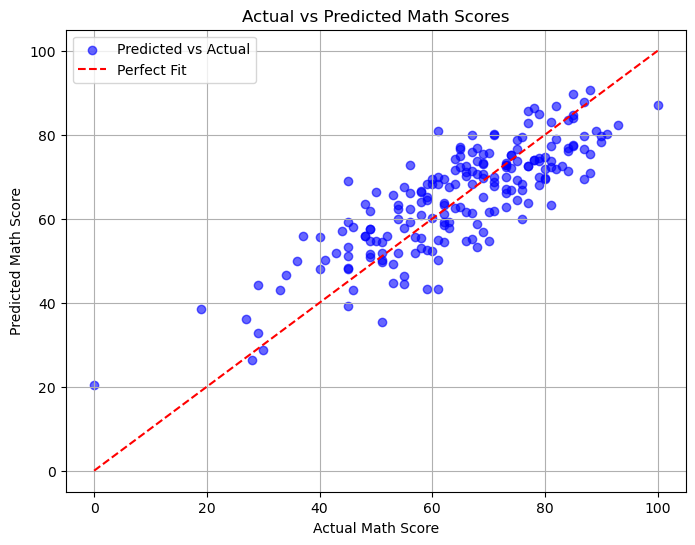

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Actual vs Predicted Math Scores')
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.legend()
plt.grid(True)
plt.show()

## Q3

In [ ]:
# Table 1 - LogisticReg- ScatterPlot - betweem 0 and 1 thus sigmoid curve
from sklearn.linear_model import LogisticRegression

In [17]:
hours = np.array([
    0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
    2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50
])

pass_fail = np.array([
    0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
    1, 0, 1, 0, 1, 1, 1, 1, 1, 1
])

In [18]:
X = hours.reshape(-1, 1)
y = pass_fail

In [19]:
model = LogisticRegression()
model.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
x_curve = np.linspace(0, 6, 300).reshape(-1, 1)
y_curve = model.predict_proba(x_curve)[:, 1]

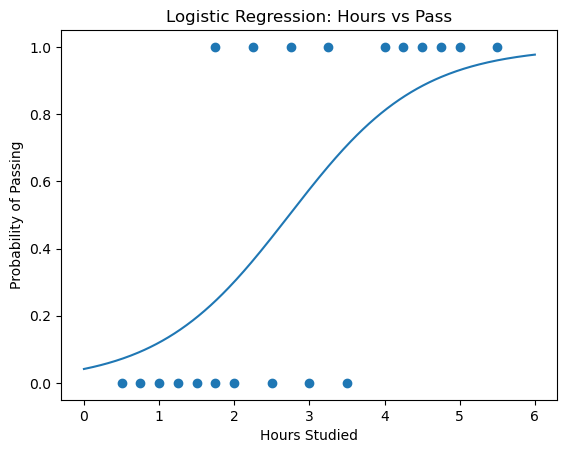

In [21]:
plt.figure()
plt.scatter(hours, pass_fail)
plt.plot(x_curve, y_curve)
plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression: Hours vs Pass")
plt.show()

## Q4

In [ ]:
# Table2 - MSE, RMSE, Hybrid Error, and MAPE

actual_sales = np.array([112, 113, 114, 115, 112, 121, 122, 114])
predicted_sales = np.array([113, 112, 116, 117, 110, 118, 121, 115])

In [38]:
mse = np.mean((actual_sales - predicted_sales) ** 2)
rmse = np.sqrt(mse)
hybrid_error = 0.3 * mse + 0.25 * rmse

mape = np.mean(np.abs((actual_sales - predicted_sales) / actual_sales)) * 100

In [39]:
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"Hybrid Error: {hybrid_error:.3f}")
print(f"MAPE: {mape:.2f}%")

MSE: 3.125
RMSE: 1.768
Hybrid Error: 1.379
MAPE: 1.40%


## Q5

In [ ]:
# Data from Table 7 - LinearReg - Scatter Plot
competitors = np.array([1, 1, 2, 3, 3, 5, 5, 6])
sales = np.array([3600, 3300, 3100, 2900, 2700, 2300, 2000, 1800])

In [32]:
X = competitors.reshape(-1, 1)
y = sales

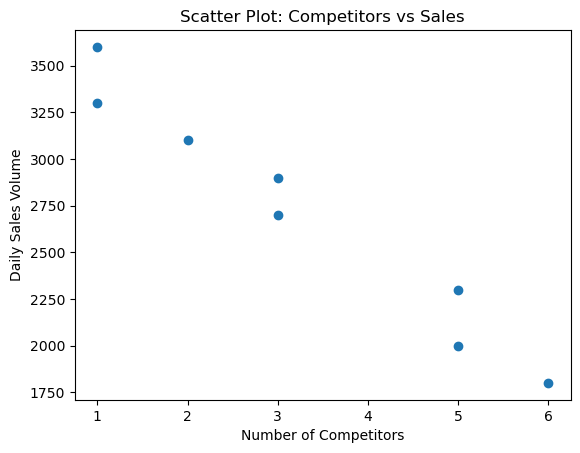

In [33]:
plt.figure()
plt.scatter(competitors, sales)
plt.xlabel("Number of Competitors")
plt.ylabel("Daily Sales Volume")
plt.title("Scatter Plot: Competitors vs Sales")
plt.show()

In [34]:
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
b0 = model.intercept_
b1 = model.coef_[0]

print(f"Linear Regression Model:")
print(f"Sales = {b0:.2f} + ({b1:.2f}) × Competitors")

Linear Regression Model:
Sales = 3773.53 + (-326.47) × Competitors


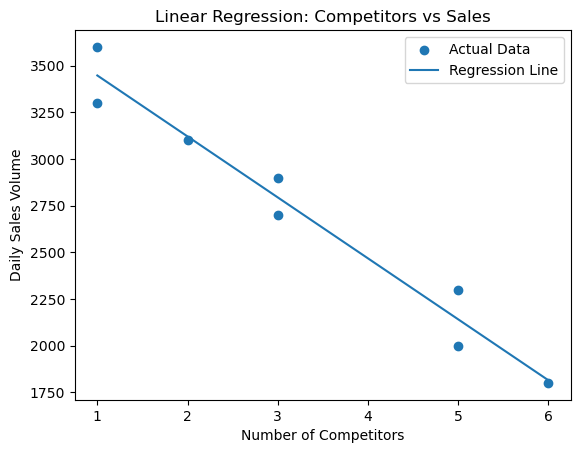

In [36]:
x_line = np.linspace(1, 6, 100).reshape(-1, 1)
y_line = model.predict(x_line)

plt.figure()
plt.scatter(competitors, sales, label="Actual Data")
plt.plot(x_line, y_line, label="Regression Line")
plt.xlabel("Number of Competitors")
plt.ylabel("Daily Sales Volume")
plt.title("Linear Regression: Competitors vs Sales")
plt.legend()
plt.show()

## Q6

In [ ]:
# Multiple Linear Regression Calculation 
X1 = np.array([3, 4, 5, 6, 2])
X2 = np.array([8, 5, 7, 3, 1])
Y  = np.array([-3.7, 3.5, 2.5, 11.5, 5.7])

In [41]:
X = np.column_stack((X1, X2))

In [42]:
model = LinearRegression()
model.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
b0 = model.intercept_
b1, b2 = model.coef_

new_data = np.array([[3, 2]])
predicted_Y = model.predict(new_data)

print("Regression Equation:")
print(f"Y = {b0:.3f} + ({b1:.3f})X1 + ({b2:.3f})X2")
print(f"Predicted Y value: {predicted_Y[0]:.3f}")

Regression Equation:
Y = 2.800 + (2.282)X1 + (-1.672)X2
Predicted Y value: 6.300
